In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data = pd.read_csv("dataDereg_copy (1).csv"); 

In [5]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:

data['state'].replace(['control', 'mild cognitive impairment', "Alzheimer's disease"],
                        [0, 1,2], inplace=True)
data

,ID_REF,state,cg01813033,cg02869929,cg08825645,cg12212591,cg13571700,cg16471167,cg16723002,cg18802998,cg19239148,cg23732080,cg24963041,cg25292967
0,GSM4299202,1,0.305918,0.225391,0.365222,0.194821,0.817949,0.591424,0.853690,0.527775,0.111685,0.770917,0.818248,0.844223
1,GSM4299203,2,0.280106,0.192200,0.242297,0.225995,0.814856,0.623102,0.874221,0.440520,0.108032,0.764916,0.844630,0.858769
2,GSM4299204,2,0.225905,0.208772,0.297325,0.240259,0.857056,0.617317,0.864899,0.486294,0.111838,0.814970,0.848023,0.827362
3,GSM4299205,0,0.242880,0.196828,0.247147,0.182578,0.832164,0.621851,0.873977,0.461899,0.108173,0.784644,0.829689,0.847609
4,GSM4299206,1,0.238867,0.192863,0.256623,0.209110,0.830051,0.585543,0.844447,0.462999,0.091722,0.790004,0.817013,0.869361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,GSM4299660,1,0.259100,0.184221,0.254607,0.195860,0.801335,0.636408,0.865518,0.381997,0.107777,0.794942,0.843555,0.869277
296,GSM4299661,0,0.268859,0.176913,0.294286,0.191150,0.826198,0.563805,0.854931,0.458813,0.095432,0.805218,0.825328,0.870684
297,GSM4299662,2,0.265198,0.217819,0.254924,0.230624,0.810608,0.591299,0.852681,0.443758,0.109096,0.812810,0.810705,0.858397
298,GSM4299663,2,0.225379,0.192428,0.271269,0.229887,0.815048,0.666782,0.861029,0.448896,0.144905,0.819085,0.849534,0.860669


In [7]:
columns = []; 

for col in data.columns:
    

def createData(size):
    xs = []; 
    ys = []; 
    for i in range(0, size):
        val = []; 
        for col in columns:
            val.append(data[col][i])
        xs.append(val)
        ys.append(data['state'][i]); 
    return xs, ys; 



In [8]:
columns

NameError: name 'columns' is not defined

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

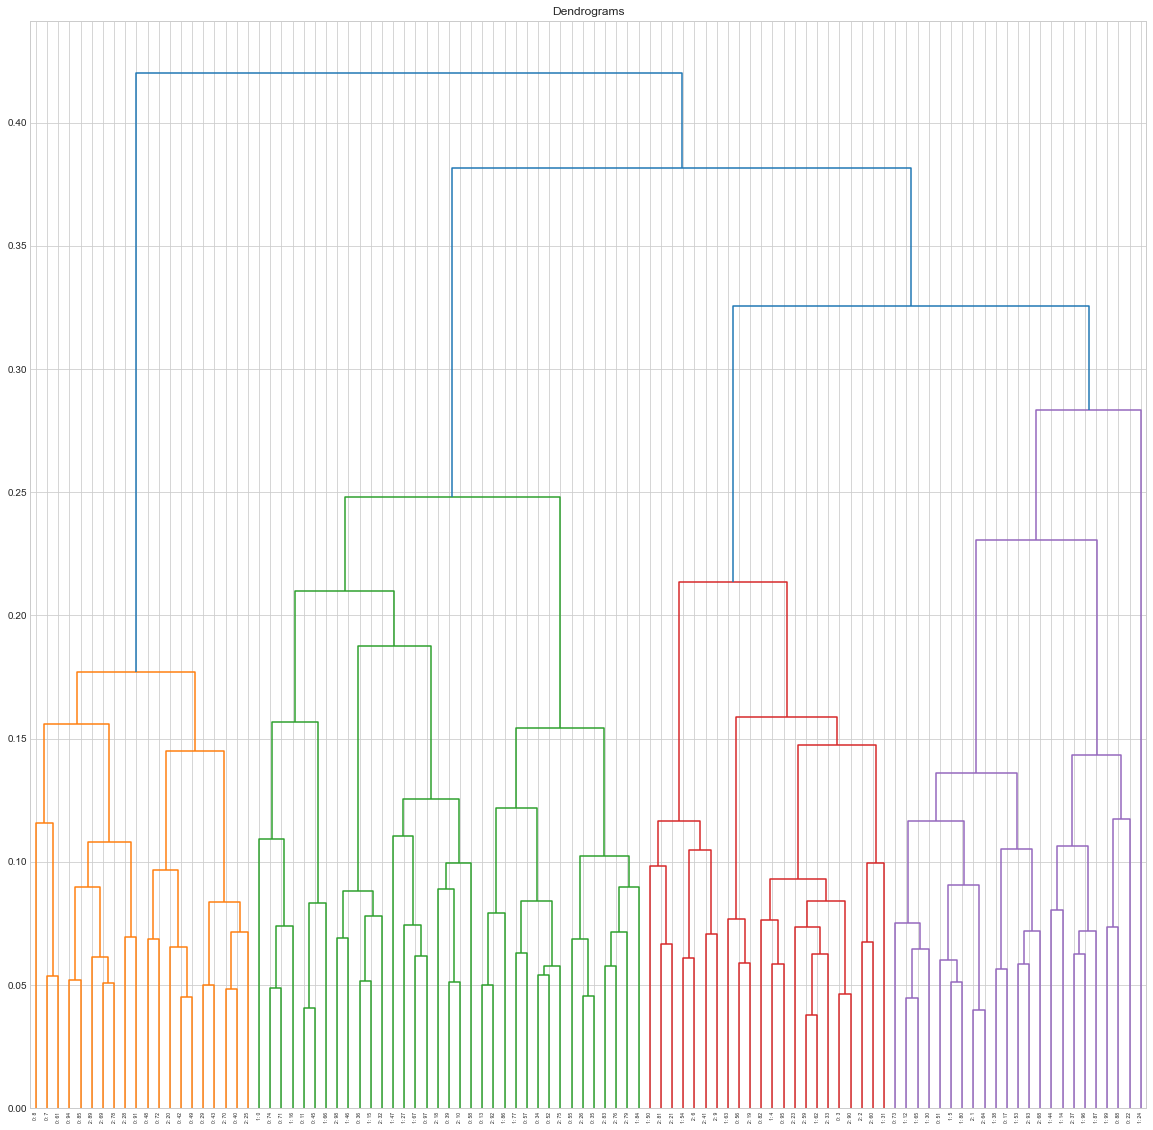

In [206]:
plt.figure(figsize=(20, 20))  
plt.title("Dendrograms")
xs, ys = createData(100)
def label_func(i):
    return str(ys[i]) + ": " + str(i); 
dend = shc.dendrogram(shc.linkage(xs, method='ward', metric='euclidean', optimal_ordering=True), 
                      leaf_label_func=label_func); 








In [136]:
import numpy as np

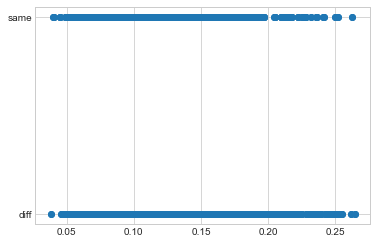

In [156]:

def euclid(ar, br): 
    val = 0; 
    for i in range(len(ar)): 
        val += (ar[i] - br[i]) ** 2; 
    return val ** (1/2); 

def hamming(ar, br):
    val = 0; 
    for i in range(len(ar)):
        val += np.absolute(ar[i] - br[i]); 
    return val 

diff = []; 
state = []; 

dist = euclid; 

for i in range(len(xs)):
    for j in range(len(xs)):
        if (i == j):
            continue; 
        if (ys[i] == ys[j]):
            diff.append(dist(xs[i], xs[j])); 
            state.append("same"); 
        else: 
            diff.append(dist(xs[i], xs[j])); 
            state.append("diff");
    
plt.scatter(diff, state); 

In [2]:
xs, ys = createData(100)
cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=60, distance_threshold=None)  
y_pred = cluster.fit(xs)
def calc_score(y_pred, y):
    arr = {};  
    for i in range(0, len(y_pred)):
        arr[y_pred[i]] = [0, 0, 0]
    for i in range(0, len(y_pred)):
        arr[y_pred[i]][ys[i]] += 1; 
    avg = 0; 
    right = 0; 
    for i in range(0, len(y_pred)):
        tot = arr[y_pred[i]][0] + arr[y_pred[i]][1]; 
        avg += tot; 
        if (arr[y_pred[i]][ys[i]] > tot-arr[y_pred[i]][ys[i]]):
            right+=1; 
    print(arr, avg/len(y_pred))
    return right/(len(y_pred))

print(str(calc_score(y_pred.labels_, ys)) + "%"); 

NameError: name 'createData' is not defined

In [213]:
import tensorflow


ModuleNotFoundError: No module named 'tensorflow'